Разведывательный анализ данных и составление отчёт по его результатам, чтобы определиться с параметрами будущей модели,которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы


импортируем нужные для чтения и первичного анализа библиотеки и
прочитаем файл:

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [135]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итак мы получили таблицу, содержащую 30 столбцов и 395 строчек. Данные представлены как числовыми так и строковыми значениями. Только три столбца заполнены данными на 100 процентов.

Рассмотрим корреляции для числовых столбцов.
Выясним, какие столбцы коррелируют с оценкой. 

In [136]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Из таблицы видно, что переменные 'studytime' и 'studytime, granular' скоррелированы полностью, одну переменную нужно исключить. Это будет переменная 'studytime, granular'. 
Вдальнейщем будем рассматривать 29 столбцов.


In [137]:
stud.drop('studytime, granular', inplace = True, axis=1) #удаляем столбец 'studytime, granular'

Поскольку в проекте надо отследить влияние на успеваемость по математике, то в первую очередь рассмотрим переменную "score", которая и является оценкой успеваемости:

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

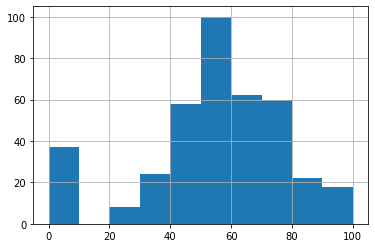

In [138]:
stud.score.hist()
stud.score.describe()


Теперь по переменной "score" можно сказать следующее:
 - Максимальная оценка 100 баллов;
 - Есть значительное количество минимальных оценок в 0 баллов;
 - всего известно 389 оценок, то есть (395-389=) 6 оценок не известны.
 Чётко выделяется группа студентов, получивших на экзамене 0 баллов, то есть они выполнили все задания неправильно или вообще не сдали свои работы, на эту группу стоит обратить отдельное внимание.
А 6 студентов без оценки надо исключить из дальнейшего анализа, так как оценка это ключевой показатель и его отсутствие делает бесполезным остальные данные. 

Удаляем 6 строчек без оценки из дальнейшего рассмотрения:

In [139]:
stud.dropna(subset=['score'],inplace=True) #Удаляем все строчки, где в столбике 'score' 'NaN'

Продолжаем изучать остальные данные.

Параметр school (аббревиатура школы, в которой учится ученик)

Проверим ученики скольких школ предоставили данные

In [140]:
stud.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

Получается, что всего две школы учавствуют в изучении, при чём учеников одной школы представлено в более чем в 7 раз меньше, чем другой.
Посмотрим средний бал учеников каждой школы:

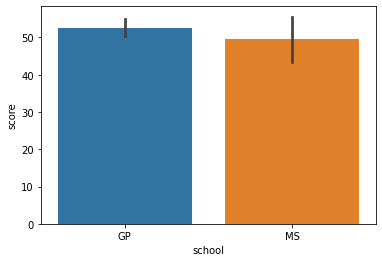

In [141]:
sns.barplot(x = 'school', y = 'score', data = stud)

count    344.000000
mean      52.630814
std       23.116772
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

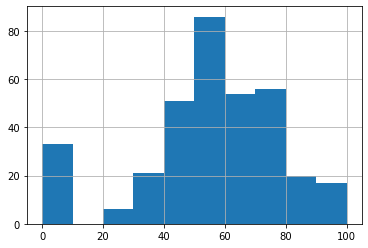

In [142]:
#оценки учеников школы GP
school_gp = stud[stud.school == 'GP']
school_gp.score.hist()
school_gp.score.describe()

count    45.000000
mean     49.444444
std      21.379212
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

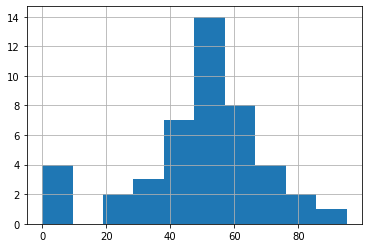

In [143]:
#оценки учеников школы MS
school_ms = stud[stud.school == 'MS']
school_ms.score.hist()
school_ms.score.describe()

Итоги:
Можно сказать, что средние оценки учеников школы GP немного выше и в этой школе больше доля отличников, чем  в школе MS. 

Параметр sex (пол ученика ('F' - женский, 'M' - мужской)).


In [144]:
stud.sex.value_counts() # количество учеников каждого пола

F    204
M    185
Name: sex, dtype: int64

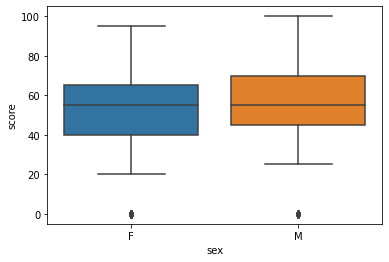

In [146]:
sns.boxplot(x = 'sex', y = 'score', data = stud) #средний бал по полу ученика

count    185.000000
mean      54.648649
std       22.572608
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

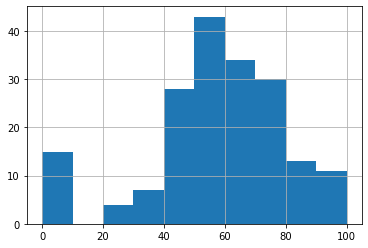

In [147]:
#оценки учеников
male = stud[stud.sex == 'M']
male.score.hist()
male.score.describe()

count    204.000000
mean      50.098039
std       23.070682
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64

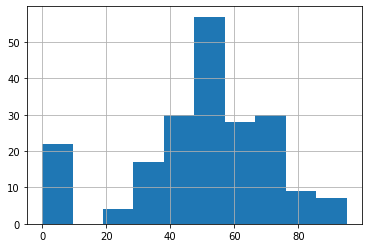

In [148]:
#оценки учениц
female = stud[stud.sex == 'F']
female.score.hist()
female.score.describe()

Итоги:
Студенты и студентки поделились на 48 и 52 процента соответственно. Средние оценки студентов выше и у них больше отличников, чем у студенток. 

Параметр age (возраст ученика)

Средние оценки по возрастам:

In [149]:
stud.age.value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

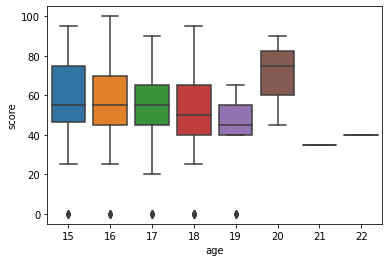

In [70]:
sns.boxplot(x = 'age', y = 'score', data = stud)

Тут можно сказать, что с увеличением возраста студентов уменьшается и средний бал за экзамен.В возрасте 20 лет средний бал резко возрастает и становиться самым высоким. Но надо учесть, что представителей этого возраста очень мало (менее 1 процента от общего числа студентов).
В итоге: чем старше студент, тем хуже средний бал.

Параметр address (тип адреса ученика ('U' - городской, 'R' - за городом))

In [150]:
stud.address.value_counts() # распределение по адресам

U    291
R     83
Name: address, dtype: int64

Из 389 адресов 15 остались неизвестными, что составляет чуть меньше 4-х процентов. 

Присвоим неизвестным адресам отдельный статус статус :

In [151]:
stud.address = stud.address.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.address.value_counts() # распределение по адресам

U      291
R       83
nan     15
Name: address, dtype: int64

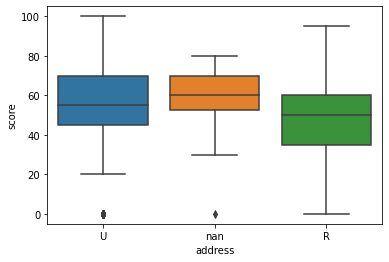

In [152]:
sns.boxplot(x = 'address', y = 'score', data = stud) #Средний бал учеников в зависимости от адреса


Итог: Студенты, живущие за городом, показывают чуть худший средний результат, чем студенты живущие в городе. В данных есть неизвестные адреса, но их количество мало и они не смогут оказать значительного влияния на средние показатели оценок, хотя их средние показатели выше, чем у остальных.

Параметр  famsize (размер семьи('LE3' <= 3, 'GT3' >3))

In [153]:
stud.famsize.value_counts() # распределение по численности семьи

GT3    255
LE3    107
Name: famsize, dtype: int64

В этом параметре тоже существуют неизвестные значения, посчитаем их, как отдельную групп: 

In [154]:
stud.famsize = stud.famsize.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.famsize.value_counts() # распределение по адресам

GT3    255
LE3    107
nan     27
Name: famsize, dtype: int64

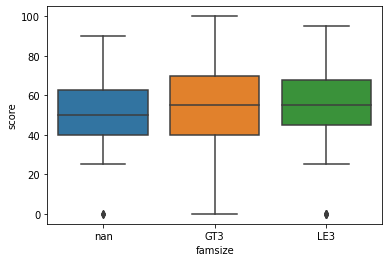

In [155]:
sns.boxplot(x = 'famsize', y = 'score', data = stud) #Средний бал учеников в зависимости от адреса

Этот параметр так же не оказывает значительного влияния на средние значения оценок.


  
  
  Параметр Pstatus (статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно))

In [156]:
#Сразу рассмотрим неизвестные значения, как отдельную группу
stud.Pstatus = stud.Pstatus.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.Pstatus.value_counts() # распределение родителям

T      308
nan     45
A       36
Name: Pstatus, dtype: int64

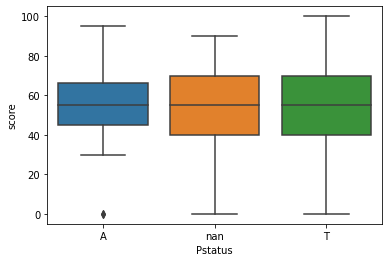

In [157]:
sns.boxplot(x = 'Pstatus', y = 'score', data = stud) #Средний бал учеников в зависимости от родителей

Имеем такую же картину, средние показатели примерно равны.

Параметр Medu(образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [158]:
stud.Medu.value_counts()

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: Medu, dtype: int64

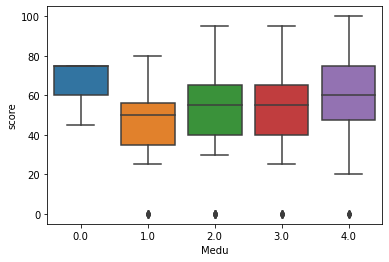

In [159]:
sns.boxplot(x = 'Medu', y = 'score', data = stud)

Как и следовало ожидать, по этому параметру отчётливо видно, что чем образованнее мать, тем выше средний бал студента. Количество необразованных и с неизвестным образованием матерей ничтожно мало, их данные не смогут повлиять на среднюю оценку.

Параметр Fedu (образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [160]:
stud.Fedu.value_counts()

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: Fedu, dtype: int64

Тут очевидна опечатка в данных так, как одно тз значений явно не отражает признак. Исходя из логики, что это опечатка,значение надо заменить на близкое по смыслу, то есть 4.  

In [161]:
stud.loc[stud['Fedu']== 40, 'Fedu'] = 4
stud.Fedu.value_counts()


2.0    105
3.0     94
4.0     89
1.0     75
0.0      2
Name: Fedu, dtype: int64

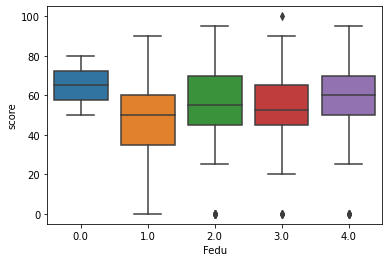

In [162]:
sns.boxplot(x = 'Fedu', y = 'score', data = stud)

В данном параметре влияние образования отца не даёт такой однозначной динамики, хотя очевидно, что более высокое образование всё равно сопутствует в более высокими оценками студента. Можно предположить. что мать занимается в семье учёбой ребёнка в большей степени чем отец

 Параметр Mjob (работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [163]:
stud.Mjob.value_counts()

other       127
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

In [164]:
stud.Mjob = stud.Mjob.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.Mjob.value_counts()

other       127
services     98
at_home      58
teacher      55
health       32
nan          19
Name: Mjob, dtype: int64

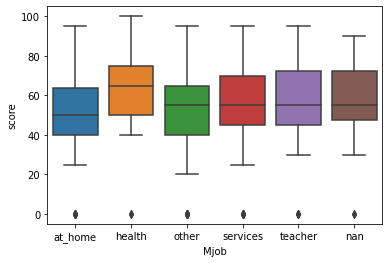

In [165]:
sns.boxplot(x = 'Mjob', y = 'score', data = stud)

В параметре Mjob явно выделяются успехи студентов, чьи матери работают в здравоохранении. Остальные примерно равны

Параметр  Fjob (работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое))

In [166]:
stud.Fjob = stud.Fjob.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.Fjob.value_counts()

other       194
services     99
nan          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

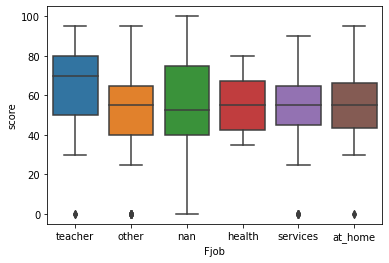

In [167]:
sns.boxplot(x = 'Fjob', y = 'score', data = stud)

По данному параметру явными лидерами по среднему баллу являются студенты, чьи отцы работают учителями. Остальные имеют примерно одинаковые показатели.

Показатель  reason (причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое))

In [168]:
stud.reason = stud.reason.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.reason.value_counts()

course        135
reputation    102
home          101
other          34
nan            17
Name: reason, dtype: int64

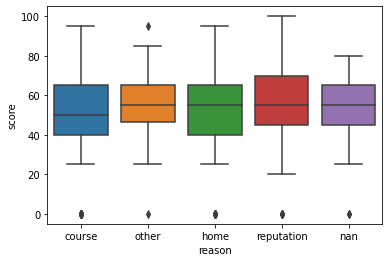

In [169]:
sns.boxplot(x = 'reason', y = 'score', data = stud)

Средняя оценка за экзамен по параметру reason похожи, однако среди тех, кто выбирал школу ориентируясь на образовательную прогрпмму показали средний результат хуже, чем все остальные. 

Параметр guardian (опекун ('mother' - мать, 'father' - отец, 'other' - другое))

In [170]:
stud.guardian = stud.guardian.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.guardian.value_counts()

mother    248
father     86
nan        31
other      24
Name: guardian, dtype: int64

sns.boxplot(x = 'guardian', y = 'score', data = stud)


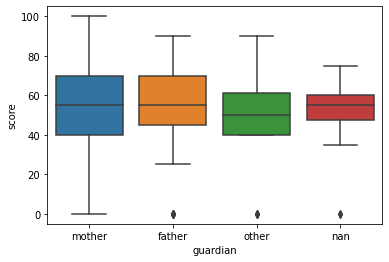

In [171]:
sns.boxplot(x = 'guardian', y = 'score', data = stud)

Средняя оценка и по этому парамерте примерно одинаковы. Можно лишь заметить, что у матерей большой разброс по результатам, а опекуны-неродители дают меньше "двоечников", но средний бал чуть ниже.


Параметр traveltime (время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.))

In [172]:
stud.traveltime = stud.traveltime.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.traveltime.value_counts()

1.0    239
2.0     94
nan     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

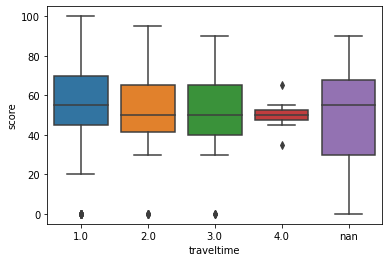

In [173]:
sns.boxplot(x = 'traveltime', y = 'score', data = stud)

Видно, что близость к дому даёт балл чуть большего среднего , не не может быьб явным преимуществом.

Параметр studytime (время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов))

In [174]:
stud.studytime = stud.studytime.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.studytime.value_counts()

2.0    189
1.0    103
3.0     63
4.0     27
nan      7
Name: studytime, dtype: int64

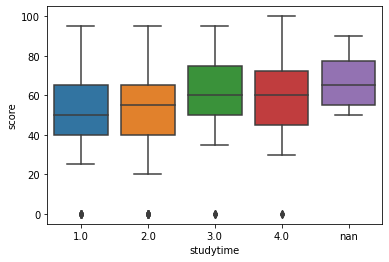

In [175]:
sns.boxplot(x = 'studytime', y = 'score', data = stud)

Прослеживается тенденция, что чем больше занимаешься, тем лучше средний балл на экзамене. Однако вопреки ожиданию студенты занимающиеся больше всех, не показали наилучший средний результат. Те, кто занимался от 5 дл 10 часов, получили меньше плохох оценок. 

Параметр failures (количество внеучебных неудач (n, если 1<=n<=3, иначе 0))

In [176]:
stud.failures = stud.failures.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.failures.value_counts()

0.0    290
1.0     48
nan     22
2.0     15
3.0     14
Name: failures, dtype: int64

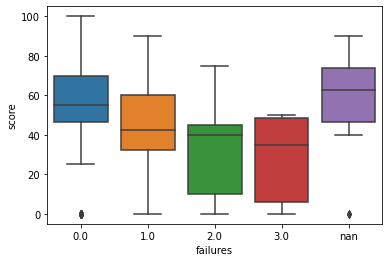

In [177]:
sns.boxplot(x = 'failures', y = 'score', data = stud)

Не совсем понял смысл этого параметра, но если идёт речь о проблемах вне школы, то здесь абсолютно предсказуемый результат: чем больше неудачь, тем ниже успеваемость. Причём в ситуации с двумя неудачами среднюю оценку "спасают" студенты, набравшие высокий балл. 

Параметр schoolsup (дополнительная образовательная поддержка (yes или no))

In [178]:
stud.schoolsup = stud.schoolsup.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.schoolsup.value_counts()

no     331
yes     49
nan      9
Name: schoolsup, dtype: int64

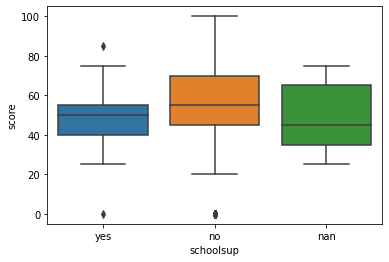

In [179]:
sns.boxplot(x = 'schoolsup', y = 'score', data = stud)

Средний балл у студентов с дополтительной образовательной поддержкой оказался ниже, чем у студентов без таковой. Даже у лучших из них бал получился ниже, чем у тех, кто не пользовался дополнительными занятиями. Можно предположить, что учащиеся больше уделяющие время другим наукам или двоечники, которым требуются дополнительные занятия.

Параметр famsup (семейная образовательная поддержка (yes или no)

In [180]:
stud.famsup = stud.famsup.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.famsup.value_counts()

yes    216
no     135
nan     38
Name: famsup, dtype: int64

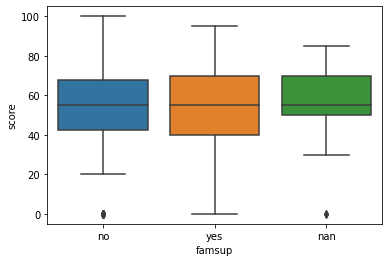

In [181]:
sns.boxplot(x = 'famsup', y = 'score', data = stud)

Семейная образовательная поддержка слабо влияет на результаты экзаменов. Средние оценки практически идентичны.

Параметр paid (дополнительные платные занятия по математике (yes или no))

In [182]:
stud.paid = stud.paid.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.paid.value_counts()

no     197
yes    153
nan     39
Name: paid, dtype: int64

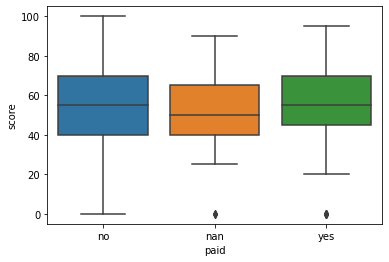

In [183]:
sns.boxplot(x = 'paid', y = 'score', data = stud)

Дополнительные платные занятия по математике не дают радикального преимущества на экзаменах, однако оценка более стабильна. Вероятно чтобы получить среднюю оценку по математике некоьорым отстающим приходится обращаться за платной помощью. Ожидалось большая разница в средних оценках между теми, кто занимался платно и теми, кто посещал только школьный курс. 

Параметр activities (дополнительные внеучебные занятия (yes или no))

In [184]:
stud.activities = stud.activities.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.activities.value_counts()

yes    192
no     183
nan     14
Name: activities, dtype: int64

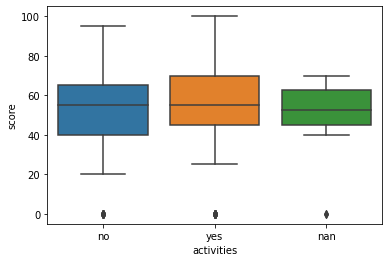

In [185]:
sns.boxplot(x = 'activities', y = 'score', data = stud)

Средние оценки у групп по признаку activities схожи. Дополнительные внеучебные занятия не оказывают на экзамены существенного влияния.

Параметр nursery (посещал детский сад (yes или no))

In [186]:
stud.nursery = stud.nursery.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.nursery.value_counts()

yes    297
no      77
nan     15
Name: nursery, dtype: int64

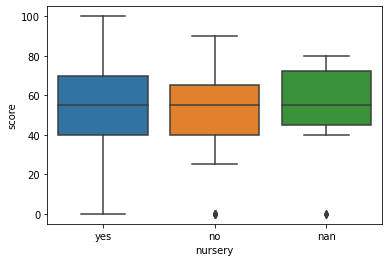

In [187]:
sns.boxplot(x = 'nursery', y = 'score', data = stud)

Посещение детского сада также не даёт преимуществ.
Средние оценки почти одинаковые.

Параметр higher (хочет получить высшее образование (yes или no))

In [188]:
stud.higher = stud.higher.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.higher.value_counts()

yes    350
nan     20
no      19
Name: higher, dtype: int64

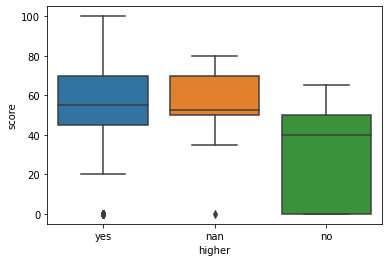

In [189]:
sns.boxplot(x = 'higher', y = 'score', data = stud)

Желание получить высшее образование положительно влияет на среднюю итоговую оценку. Логично, что тот, кто хочет учиться дальше старается учиться лучше.

Параметр  internet (наличие интернета дома (yes или no))

In [190]:
stud.internet = stud.internet.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.internet.value_counts()

yes    300
no      55
nan     34
Name: internet, dtype: int64

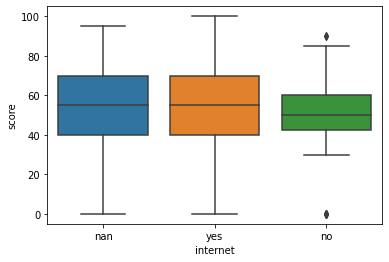

In [191]:
sns.boxplot(x = 'internet', y = 'score', data = stud)

Студенты имеющие дома интернет не сильно отличаются по средним оценкам от студентов, которые живут без домашнего тнтернета.

Параметр romantic (в романтических отношениях (yes или no))

In [192]:
stud.romantic = stud.romantic.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.romantic.value_counts()

no     235
yes    123
nan     31
Name: romantic, dtype: int64

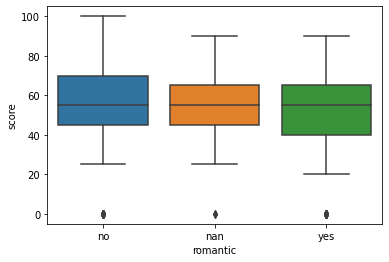

In [193]:
sns.boxplot(x = 'romantic', y = 'score', data = stud)


Больше студентов, имеющие романтические отношенияя, учаться в среднем чють хуже, чем те, кто таких отношений не имеет. Но средняя оценка примерно ровна.

Параметр famrel (семейные отношения (от 1 - очень плохо до 5 - очень хорошо))

In [194]:
stud.famrel = stud.famrel.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.famrel.value_counts()

4.0     178
5.0      97
3.0      62
nan      27
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

В данных наблюдается значение, не отвечающее параметрам. Из логики меняем его на 1, считая "-" опечаткой:

In [198]:
stud.loc[stud['famrel']== -1, 'famrel'] = 1
stud.famrel.value_counts()

4.0     178
5.0      97
3.0      62
nan      27
2.0      17
1.0       7
-1.0      1
Name: famrel, dtype: int64

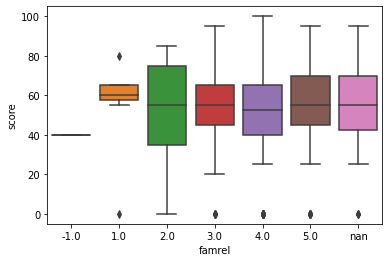

In [196]:
sns.boxplot(x = 'famrel', y = 'score', data = stud)

Влияние семейных отношений не очевидно. Прихороших семейных отношениях средняя оценка чуть меньше, но меньше шанс получить плохую оценку ниже. Удивили отношения с оценкой совсем плохо, такие студенты имеют самую высокую среднюю оценку, у когото получилось набрать высокий балл, совсем низких баллов совсем нет, за исключением тех, кто получил 0.

Параметр freetime (свободное время после школы (от 1 - очень мало до 5 - очень мого))

In [199]:
stud.freetime = stud.freetime.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.freetime.value_counts()

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
nan      9
Name: freetime, dtype: int64

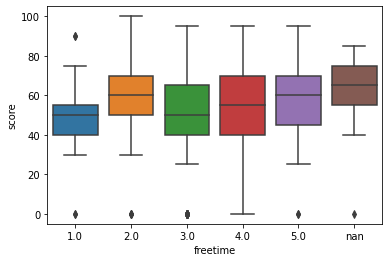

In [202]:
sns.boxplot(x = 'freetime', y = 'score', data = stud)

Зависимость оценки от свободного времени существует, но она не линейна. В совокупности лучшие результаты показывают те, у кого остаётся мало свободного времени. Можно предположить, что эти студенты уделяют учёбе больше времени. 

Параметр goout (проведение времени с друзьями (от 1 - очень мало до 5 - очень много))

In [203]:
stud.goout = stud.goout.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.goout.value_counts()

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
nan      7
Name: goout, dtype: int64

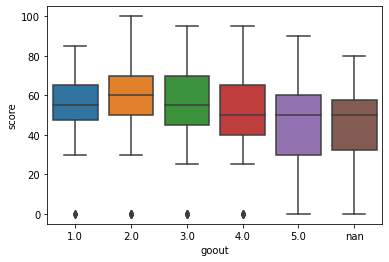

In [204]:
sns.boxplot(x = 'goout', y = 'score', data = stud)

Тут есть очевидная тенденция: чем больше времени проводишь с друзьями, тем ниже средний балл на экзамене.

Параметр health (текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо))

In [205]:
stud.health = stud.health.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.health.value_counts()

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
nan     15
Name: health, dtype: int64

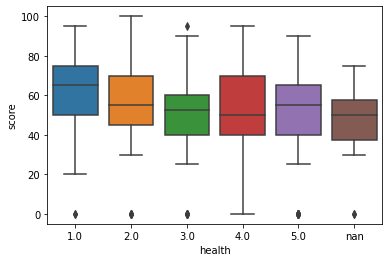

In [206]:
sns.boxplot(x = 'health', y = 'score', data = stud)

Лучше всех экзамены сдали те, у кого состояние здоровья хуже.


Параметр absences (количество пропущенных занятий)

In [208]:
stud.absences = stud.absences.astype(str).apply(lambda x: 'N' if x.strip() == 'NaN' else x)
stud.absences.value_counts()

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
14.0      12
12.0      12
nan       11
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
9.0        3
1.0        3
22.0       3
11.0       2
13.0       2
15.0       2
17.0       1
56.0       1
25.0       1
212.0      1
24.0       1
385.0      1
19.0       1
54.0       1
38.0       1
26.0       1
75.0       1
30.0       1
40.0       1
21.0       1
28.0       1
23.0       1
Name: absences, dtype: int64

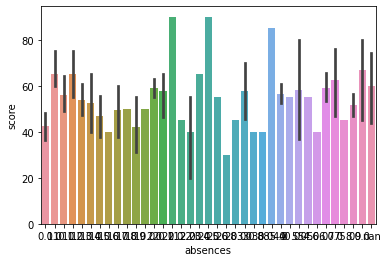

In [211]:
sns.barplot(x = 'absences', y = 'score', data = stud)

Чуть менше 30% учеников не пропустили ни одного занятия, но именно эта группва показала самый маленький средний балл на экзамене. Посещение всех занятий не означает гарантированно хороших оценок. Некоторые студенты довольно хорошо сдали экзамен

Итоги.
Просмотрев все параметры из таблицы можно сделать следующие выводы:
1. Изначально таблица с данными содержала 395 строк и 30 столбцов.
2. При рассмотрении корреляции для числовых столбцов найдено два параметра, которые полностью коррелируются. Один из столбцов безболезненно удалён.
3. При изучении основного показателя было выявлено две группы данных, выбивающихся из общей картины. Это неизвестные данные и нулевые значения. Неизвестные данные мы исключили из рассмотрения, так как это основной показатель, он не може быть неизвестным. А вот значение 0 вполне укладывается в логику выставления оценок, его мы оставляем.
4. Рассматривая остальные данные выяснилось, что хоть в таблице много числовых значенй (кроме "score"), но только параметр "absences" отражает реальное число. Остальные значения по существу являются номинативными, так как всего лишь являются обозначением определённой группы. 
5. Вданных имеются пропуски, но их количество не значительно. Параметры по сути определяют группы, по этому считаю не целесообразным присваивать неизвестным параметрам какие либо значения, предлагаю рассматривать их как отдельную группу.
6. Были выявлены два значения, которые представляли собой явные опечатки. Они были заменены на пригодные по смыслу.
7. Из дальнейшего оборота предлагается убрать параметры 'sex', 'famsize', 'Pstatus', 'traveltime', 'famsap', 'romantic' в связи с незначительным влиянием этих параметров на 'sco 